In [1]:
!pip install numpy 
!pip install pandas
!pip install matplot
!pip install tensorflow

!pip install streamlit


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
data_train_path=data_train_path = 'Fruits_Vegetables/train'

data_test_path=data_train_path = 'Fruits_Vegetables/test'

data_val_path=data_train_path = 'Fruits_Vegetables/validation'


In [8]:
img_width=180
img_height=180


In [9]:
!pip install --upgrade tensorflow


In [10]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False # If you have a validation split, ensure it's correctly configured
)

Found 351 files belonging to 36 classes.


In [11]:
data_cat=data_train.class_names

In [21]:
data_val=tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                     shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [22]:
data_test=tf.keras.utils.image_dataset_from_directory(
     data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


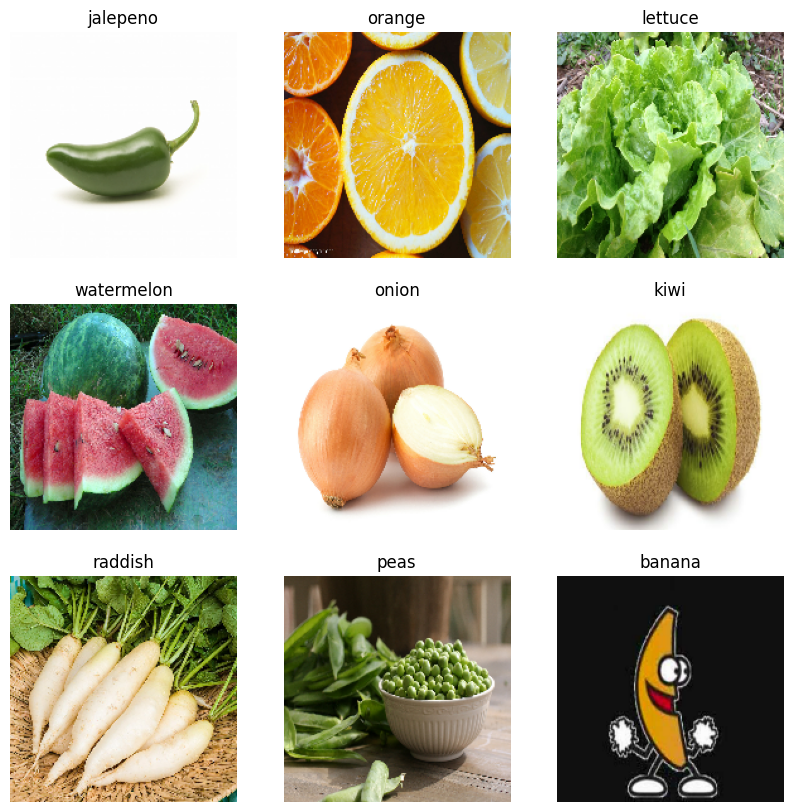

In [23]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])



In [27]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [28]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.0121 - loss: 4.1057 - val_accuracy: 0.1140 - val_loss: 3.4948
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.0871 - loss: 3.4781 - val_accuracy: 0.1396 - val_loss: 3.1257
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.1440 - loss: 3.0494 - val_accuracy: 0.4758 - val_loss: 2.2465
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4412 - loss: 2.2385 - val_accuracy: 0.6410 - val_loss: 1.5581
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6380 - loss: 1.5210 - val_accuracy: 0.7977 - val_loss: 0.8077
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7899 - loss: 0.8150 - val_accuracy: 0.9487 - val_loss: 0.3795
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9176 - loss: 0.4049 - val_accuracy: 0.9573 - val_loss: 0.1963
Epoch 8/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9674 - loss: 0.1844 - val_accuracy: 0.9915 - val_loss:

Text(0.5, 1.0, 'Loss')

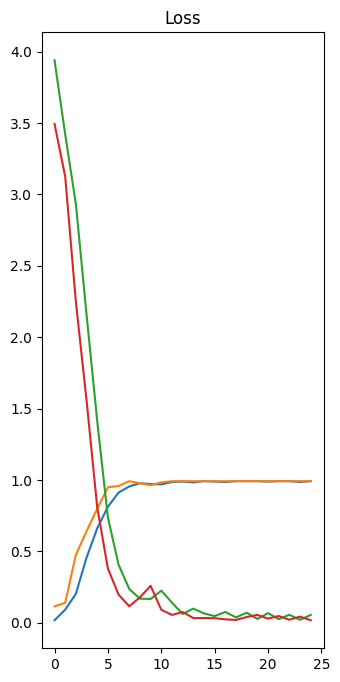

In [29]:
epochs_range =range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')



plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [54]:
image='corn.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [55]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [56]:
score=tf.nn.softmax(predict)


In [57]:
print('Vegetable/Fruit in image is {} with an accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score) * 100))


Vegetable/Fruit in image is sweetcorn with an accuracy of 67.01


In [ ]:
model.